In [1]:
import numpy as np
import os
import argparse
import random
import math
import json
import numpy as np
import scipy
import matplotlib.pylab as plt
#import torch
import math
import copy
import random
import os
#import cvxpy as cp
from random import randrange

In [2]:
def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--hidden-dim", default = 20, type = int)
    parser.add_argument("--range", default = .5, type = float)
    parser.add_argument("--corruption-level", default = 0, type = float)
    parser.add_argument("--num-rounds", default = 10000, type = int)
    parser.add_argument("--num-trials", default = 10, type = int)
    parser.add_argument("--seed", type=int, default = 201912)
    parser.add_argument("--norm-a", default = 1., type = float)
    parser.add_argument("--norm-b", default = 1., type = float)
    parser.add_argument("--num-actions", default = 20, type = int)
    args = parser.parse_args()
    return args


In [3]:
def init_vector(dim, norm):
    vec = 2 * np.random.rand(dim) - 1.
    return vec * norm / math.sqrt(dim)


In [4]:
def init_arms(dim, norm, num):
    decision = np.random.rand(num, dim)
    for i in range(num):
        decision[i] = init_vector(dim, norm)
    return decision


In [5]:
dim = 5
sigma= 0.1
corruption = 0
T= 10000
repeat = 1000
actions = 20
norm = 1
bmu = np.ones(dim)/ math.sqrt(dim)

In [ ]:
for jjjj in range(repeat):
    ############tabular###################
    corruption =int(jjjj /100)*50 
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Corruption OFUL###################
    LAMBDA = 1
    beta=1.5
    alpha=0.2
    SIGMA = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros(dim)
    REGRET = 0
    TOTALREGRET = []
    for t in range(T):
        weight = 1
        noise=np.random.randn(actions) * sigma
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        rewardS = np.random.randn(actions)
        reward = np.random.randn(actions)
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu)
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu)
        hattheta = np.linalg.lstsq(SIGMA[:,:], BB[:], rcond=-1)
        hattheta = hattheta[0]
        hattheta.shape = (dim)
        MAX_R = float("-inf")
        for a_t in range(actions):
            action_t = decision[a_t]
            UU=np.linalg.lstsq(SIGMA[:,:], action_t, rcond=-1)
            UU= UU[0]
            UU.shape = (dim)
            r_action_t = np.dot(action_t, hattheta) + beta * np.sqrt(np.dot(UU,action_t))
            if MAX_R < r_action_t: 
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t
                weight = min(1,alpha/np.sqrt(np.dot(UU,action_t)))
        REGRET += optimal_reward - np.dot(action, bmu)
        SIGMA[:,:]  = SIGMA[:,:] + weight*np.mat(action).T * np.mat(action)
        BB[:] = BB[:] + weight*reward[final_a_t] * action
        TOTALREGRET.append(REGRET)
    path  = "AdditiveC_lowerbound_" + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 
    

0 0
0 1
0 2
0 3
0 4


In [ ]:
for jjjj in range(repeat):
    ############tabular###################
    #print(jjjj)
    corruption =int(jjjj /100)*50 
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Corruption OFUL###################
    LAMBDA = 1
    beta=1
    alpha=1
    SIGMA = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros(dim)
    REGRET = 0
    TOTALREGRET = []
    for t in range(T):
        noise=np.random.randn(actions) * sigma
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        rewardS = np.random.randn(actions)
        reward = np.random.randn(actions)
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu)
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu)
        hattheta = np.linalg.lstsq(SIGMA[:,:], BB[:], rcond=-1)
        hattheta = hattheta[0]
        hattheta.shape = (dim)
        MAX_R = float("-inf")
        for a_t in range(actions):
            action_t = decision[a_t]
            UU=np.linalg.lstsq(SIGMA[:,:], action_t, rcond=-1)
            UU= UU[0]
            UU.shape = (dim)
            r_action_t = np.dot(action_t, hattheta) + beta * np.sqrt(np.dot(UU,action_t))
            if MAX_R < r_action_t: 
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t
        REGRET += optimal_reward - np.dot(action, bmu)
        SIGMA[:,:]  = SIGMA[:,:] + np.mat(action).T * np.mat(action)
        BB[:] = BB[:] + reward[final_a_t] * action
        TOTALREGRET.append(REGRET)
    path  = "OFUL_lowerbound_" + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 
    

In [ ]:
for jjjj in range(repeat):
    ############tabular###################
    #print(jjjj)
    corruption =int(jjjj /100)*50 
    number =  jjjj-100*int(jjjj /100)
    print(corruption, number)
    cur_crr = 0
    decision_t = init_arms(dim, norm, actions)
    ############Corruption OFUL###################
    LAMBDA = 1
    beta=10
    alpha=1
    SIGMA = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros(dim)
    REGRET = 0
    TOTALREGRET = []
    for t in range(T):
        noise=np.random.randn(actions) * sigma
        flag = 0
        if cur_crr < corruption:
            decision = init_arms(dim, norm, actions)
            if cur_crr < corruption:
                flag = 1
        else:
            decision = decision_t
        decision = init_arms(dim, norm, actions)
        rewardS = np.random.randn(actions)
        reward = np.random.randn(actions)
        optimal_reward = float("-inf")
        for arm in range(actions):
            rewardS[arm] = noise[arm] + np.dot(decision[arm], bmu)
            reward[arm] = rewardS[arm]
            if np.dot(decision[arm], bmu) > optimal_reward:
                optimal_reward = np.dot(decision[arm], bmu)
        if flag == 1:
            cur_crr += 1
            for arm in range(actions):
                reward[arm] = noise[arm] - np.dot(decision[arm], bmu)
        hattheta = np.linalg.lstsq(SIGMA[:,:], BB[:], rcond=-1)
        hattheta = hattheta[0]
        hattheta.shape = (dim)
        MAX_R = float("-inf")
        for a_t in range(actions):
            action_t = decision[a_t]
            r_action_t = np.dot(action_t, hattheta)
            if MAX_R < r_action_t: 
                MAX_R = r_action_t
                final_a_t = a_t
                action = action_t
        REGRET += optimal_reward - np.dot(action, bmu)
        SIGMA[:,:]  = SIGMA[:,:] + np.mat(action).T * np.mat(action)
        BB[:] = BB[:] + reward[final_a_t] * action
        TOTALREGRET.append(REGRET)
    path  = "Greedy_lowerbound_" + str(number) +"_"+ str(corruption)+".txt"
    fr = open(path,'w')
    for i in TOTALREGRET:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 
    

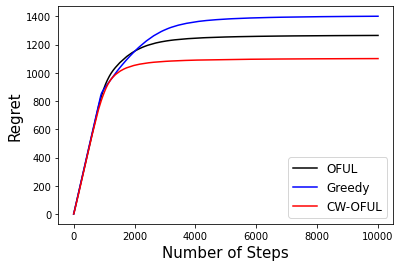

<Figure size 432x288 with 0 Axes>

In [20]:
number = 450
repeat = 100
corrupt=0
rewardrobust = np.zeros(T+1)
rewardgreedy = np.zeros(T+1)
rewardOFUL = np.zeros(T+1)
finalrewardrobust = np.zeros(11)
finalrewardgreedy = np.zeros(11)
finalrewardOFUL = np.zeros(11)
for jjjj in range(repeat):
    line1=0
    path  = "AdditiveC_lowerbound_" + str(jjjj) +"_"+ str(number)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardrobust[line1]=rewardrobust[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardrobust[i] = rewardrobust[i]/repeat



for jjjj in range(repeat):
    line1=0
    path  = "Greedy_lowerbound_" + str(jjjj) +"_"+ str(number)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardgreedy[line1]=rewardgreedy[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardgreedy[i] = rewardgreedy[i]/repeat


for jjjj in range(repeat):
    line1=0
    path  = "OFUL_lowerbound_" + str(jjjj) +"_"+ str(number)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOFUL[line1]=rewardOFUL[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardOFUL[i] = rewardOFUL[i]/repeat

x=list(range(1,T))
plt.plot(x, rewardOFUL[0:T-1],color='black', label='OFUL')
    
x=list(range(1, T))
plt.plot(x, rewardgreedy[0:T-1],color='blue', label='Greedy')

x=list(range(1, T))
plt.plot(x, rewardrobust[0:T-1],color='red', label='CW-OFUL')
plt.legend(fontsize=12)
plt.xlabel('Number of Steps',size=15)
# naming the y axis
plt.ylabel('Regret',size=15)
# giving a title to my graph
plt.savefig(os.path.join('0_pdf' + "test.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./666.jpg')

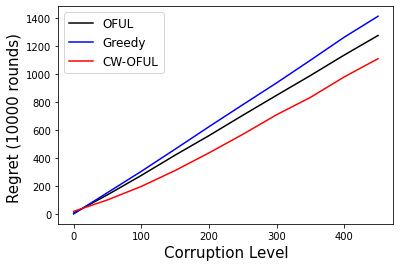

<Figure size 432x288 with 0 Axes>

In [16]:
number = 450
repeat = 100

rewardrobust = np.zeros(T+1)
rewardgreedy = np.zeros(T+1)
rewardOFUL = np.zeros(T+1)
finalrewardrobust = np.zeros(11)
finalrewardgreedy = np.zeros(11)
finalrewardOFUL = np.zeros(11)
for j in range(10):
    for jjjj in range(repeat):
        line1=0
        path  = "AdditiveC_lowerbound_" + str(jjjj) +"_"+ str(j*50)+".txt"
        fr = open(path,'r')
        for line in fr:
            rewardrobust[line1]=rewardrobust[line1]+float(line)
            line1+=1
        fr.close() 
    for i in range(T):
        rewardrobust[i] = rewardrobust[i]/repeat
    finalrewardrobust[j]= rewardrobust[T-1]


for j in range(10):
    for jjjj in range(repeat):
        line1=0
        path  = "Greedy_lowerbound_" + str(jjjj) +"_"+ str(j*50)+".txt"
        fr = open(path,'r')
        for line in fr:
            rewardgreedy[line1]=rewardgreedy[line1]+float(line)
            line1+=1
        fr.close() 
    for i in range(T):
        rewardgreedy[i] = rewardgreedy[i]/repeat
    finalrewardgreedy[j]= rewardgreedy[T-1]


    
for j in range(10):
    for jjjj in range(repeat):
        line1=0
        path  = "OFUL_lowerbound_" + str(jjjj) +"_"+ str(j*50)+".txt"
        fr = open(path,'r')
        for line in fr:
            rewardOFUL[line1]=rewardOFUL[line1]+float(line)
            line1+=1
        fr.close() 
    for i in range(T):
        rewardOFUL[i] = rewardOFUL[i]/repeat
    finalrewardOFUL[j]= rewardOFUL[T-1]
x=list(range(0, 500,50))
plt.plot(x, finalrewardOFUL[0:10],color='black', label='OFUL')
    
x=list(range(0, 500,50))
plt.plot(x, finalrewardgreedy[0:10],color='blue', label='Greedy')

x=list(range(0, 500,50))
plt.plot(x, finalrewardrobust[0:10],color='red', label='CW-OFUL')
    

plt.legend(fontsize=12)
plt.xlabel('Corruption Level',size=15)
# naming the y axis
plt.ylabel('Regret (10000 rounds) ',size=15)
# giving a title to my graph
plt.savefig(os.path.join('01_pdf' + "test.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./6666.jpg')

In [17]:
finalrewardOFUL[0:10]

array([   9.56056602,  140.04636102,  278.23389665,  423.014634  ,
        562.04644155,  707.19210631,  849.83338383,  990.82499042,
       1136.83826334, 1276.51471036])

In [18]:
finalrewardgreedy[0:10]

array([   3.7143302 ,  155.64191759,  307.35751724,  465.48905781,
        625.52401196,  782.64234344,  938.18745006, 1099.84370306,
       1264.09676574, 1413.7818221 ])

In [19]:
finalrewardrobust[0:10]

array([  21.85905004,  103.57861378,  199.84137596,  313.22431188,
        438.95089419,  571.24516627,  711.06744017,  834.8027862 ,
        980.98760185, 1110.86812841])